### 1. Notwendige Bibliotheken importieren

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Titanic-Datensatz laden

In [2]:
df = sns.load_dataset('titanic')

### 3. EDA: Erste Datenübersicht

In [3]:
df.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

#### 4. Describe-Funktion: 
##### Mit der Funktion lassen wir uns einfach statistische Werte wie Durchschnitt, Standardabweichungen usw. ausgeben

In [4]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

#### 5. .info: Allgemeine Informationen zum Datensatz
##### Es zeigt uns welcher Datentyp sich in jeder Spalte verbirgt und wie viele Daten fehlen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##### Hier kann man gut erkennen das einige interessante Daten nicht vollständig sind.
- 177 Altersangaben (age)
- 3 mal eingeschiffte Personen (embarked) sowie die dazu gehörige Stadt (embark_twon) 
- 688 mal die Decknummer (deck) der Passagiere

#### 6. Die vorhanden Daten bereinigen und die Informationen aus dem src ziehen
##### Die Daten vor der Bereinigung

In [14]:
import sys
sys.path.append("../src")  # Den Ordner "src" zum Python-Pfad hinzufügen

from datenvorbereitung import lade_titanic_daten, bereinige_daten, vergleiche_daten

# Originaldaten laden
df_original = lade_titanic_daten()

# Bereinigte Daten erhalten
df_bereinigt = bereinige_daten(df_original)

# Unterschiede anzeigen
vergleiche_daten(df_original, df_bereinigt)

# Erste Zeilen ausgeben, um den Vergleich visuell zu überprüfen
df_original.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

##### Die Daten nach der Bereinigung

In [13]:
df_bereinigt.head(10)

survived  pclass   age  sibsp  parch     fare embarked    who
0         0       3  22.0      1      0   7.2500        S    man
1         1       1  38.0      1      0  71.2833        C  woman
2         1       3  26.0      0      0   7.9250        S  woman
3         1       1  35.0      1      0  53.1000        S  woman
4         0       3  35.0      0      0   8.0500        S    man
5         0       3  28.0      0      0   8.4583        Q    man
6         0       1  54.0      0      0  51.8625        S    man
7         0       3   2.0      3      1  21.0750        S  child
8         1       3  27.0      0      2  11.1333        S  woman
9         1       2  14.0      1      0  30.0708        C  child

##### Entfernte Spalten und Begründung

| **Spalte**      | **Grund für Entfernung** |
|----------------|----------------------|
| `embark_town`  | Redundant – die Spalte `embarked` enthält bereits die gleiche Information in kompakter Form (C, Q, S). |
| `alive`        | Redundant – die Spalte `survived` enthält bereits die Überlebensinformationen (1 = überlebt, 0 = nicht überlebt). |
| `deck`         | Viele fehlende Werte – enthält sehr viele `NaN`-Werte, sodass die Information nicht zuverlässig genutzt werden kann. |
| `class`        | Redundant – `pclass` enthält bereits die gleiche Information numerisch (1, 2, 3 statt "First", "Second", "Third"). |
| `sex`          | Ersetzt `who`, um zwischen Kindern und Erwachsenen zu unterscheiden ("man", "woman", "child"). |
| `adult_male`   | Redundant – Diese Information kann bereits aus `who` abgeleitet werden und ist nicht relevant. |
| `alone`        | Redundant – Diese Information kann aus `sibsp` (Anzahl Geschwister/Ehepartner) und `parch` (Anzahl Eltern/Kinder) berechnet werden. |

#### 7. Überlebensrate auf der Titanic
##### Prozentualer Anteil der Überlebenen

In [19]:
survival_counts = df_bereinigt['survived'].value_counts()
survival_rate = (survival_counts[1] / survival_counts.sum()) * 100

print(f"Die Gesamtüberlebensrate beträgt: {survival_rate:.2f}%")

Die Gesamtüberlebensrate beträgt: 38.38%


##### ❌ Generelle Überlebensrate (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

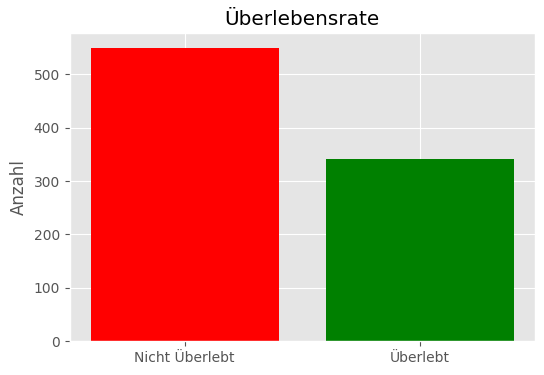

In [20]:
plt.figure(figsize=(6,4))
bars = plt.bar(['Nicht Überlebt', 'Überlebt'], [df_bereinigt['survived'].value_counts()[0], df_bereinigt['survived'].value_counts()[1]], color=['red', 'green'])
plt.xticks(['Nicht Überlebt', 'Überlebt'])
plt.ylabel("Anzahl")
plt.title("Überlebensrate")

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate.png')

plt.show()


##### ❌ Visualisierung der Überlebensrate nach Geschlecht (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

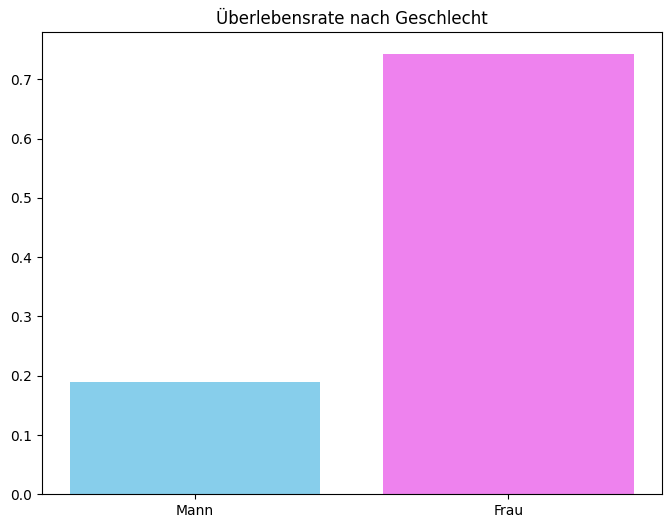

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(["Mann", "Frau"], [df.groupby("sex")["survived"].mean()["male"],df.groupby("sex")["survived"].mean()["female"]], color= ["skyblue","violet"])
plt.title('Überlebensrate nach Geschlecht')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate_by_gender.png')

# Diagramm schließen
plt.show()

##### ❌ Visualisierung der Überlebensrate nach Passagierklasse (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

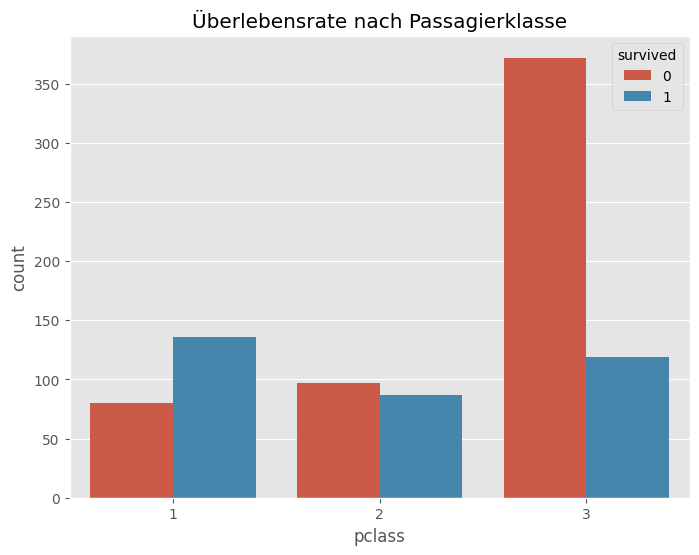

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Überlebensrate nach Passagierklasse')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate_by_class.png')

# Diagramm schließen
plt.show()

##### ❌ Visualisierung der Überlebensrate nach Alter (muss überarbeitet werden, daten aus dem src ziehen und diagramm aus dem results laden)

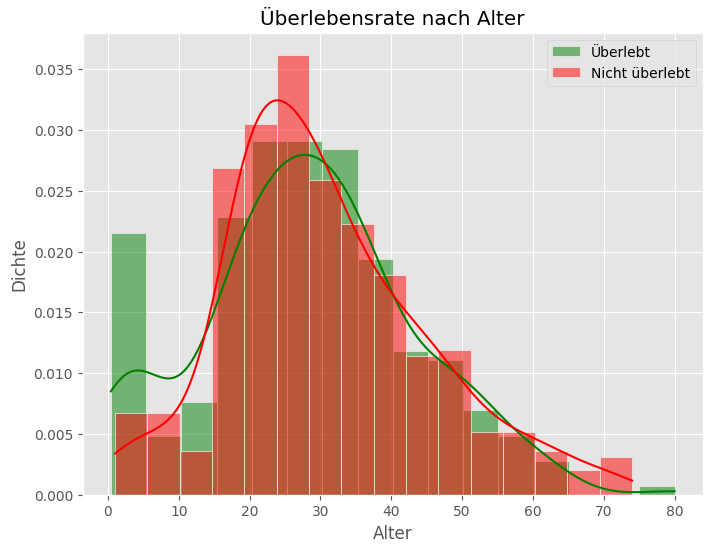

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['survived'] == 1]['age'], kde=True, color='green', label='Überlebt', stat='density')
sns.histplot(df[df['survived'] == 0]['age'], kde=True, color='red', label='Nicht überlebt', stat='density')
plt.title('Überlebensrate nach Alter')
plt.xlabel('Alter')
plt.ylabel('Dichte')
plt.legend()

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\/survival_rate_by_age.png')

# Diagramm schließen
plt.show()